<a href="https://colab.research.google.com/github/XHuang2046/Customer-Lifetime-Value-Analysis/blob/main/retail_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import datetime as dt
warnings.filterwarnings('ignore')

In [ ]:
pip install lifetimes

In [3]:
from lifetimes.plotting import *
from lifetimes.utils import *

In [4]:
# Loading the data 
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Data Explorating and Cleaning

In [ ]:
df.isnull().sum() # There are 1454 missing values in Description and 135080 missing values in CustomerID.

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
a = df.InvoiceNo.nunique() # num of orders
b = df[df['CustomerID'].isnull()].InvoiceNo.nunique() # number of orders without customer ID
print('There are %d orders totally, %d oders with customer ID and %d orders without.'%(a,a-b,b))

There are 25900 orders totally, 22190 oders with customer ID and 3710 orders without.


In [80]:
print('There are %d of registered customers'%(df['CustomerID'].nunique())) # Count number of customers 

There are 4372 of registered customers


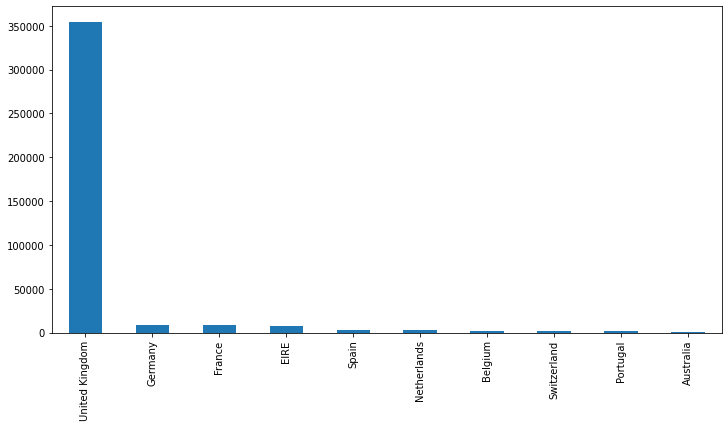

In [118]:
# Most items were bought by UK customers
df.Country.value_counts()[:10].plot(kind='bar',figsize=(12,6));

In [5]:
df['Sales'] = df['Quantity'] * df['UnitPrice'] 
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00


In [7]:
df.index = df['InvoiceDate']
df.drop(columns=['InvoiceDate'],inplace=True)

In [8]:
table = df[['Quantity','Sales']].groupby(pd.Grouper(freq="M")).sum()
table

,Quantity,Sales
InvoiceDate,,
2010-12-31,342228,748957.020
2011-01-31,308966,560000.260
2011-02-28,277989,498062.650
2011-03-31,351872,683267.080
2011-04-30,289098,493207.121
2011-05-31,380391,723333.510
2011-06-30,341623,691123.120
2011-07-31,391116,681300.111
2011-08-31,406199,682680.510


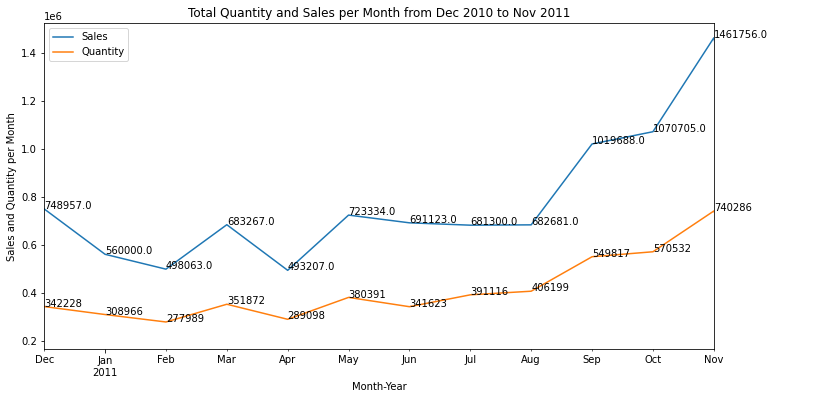

In [9]:
fig, ax = plt.subplots(figsize = (12,6))
ax = table['Sales'].plot(label = 'Sales')
for i,j in table['Sales'].items():
    ax.annotate(str(round(j,0)), xy=(i, j))
ax = table['Quantity'].plot(label = 'Quantity')
for i,j in table['Quantity'].items():
    ax.annotate(str(j), xy=(i, j))
ax.legend(loc=0)
ax.set_xlabel("Month-Year")
ax.set_ylabel(r"Sales and Quantity per Month")
ax.set_xlim([dt.date(2010, 12, 31), dt.date(2011, 11, 30)])
plt.title('Total Quantity and Sales per Month from Dec 2010 to Nov 2011')
plt.show()

The sales increase in the last season, probably because of the holiday.

In [12]:
# remove the rows without customer ID
df.dropna(subset = ['CustomerID'], inplace=True)

#### Explore the possible reasons for negative quantity.

In [15]:
len(df[df['Quantity']<0]) # There are 8905 rows with quantity less than 0.

8905

In [26]:
df[df['Quantity']<0].head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Sales
InvoiceDate,,,,,,,,
2010-12-01 09:41:00,C536379,D,Discount,-1,27.50,14527.0,United Kingdom,-27.50
2010-12-01 09:49:00,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,4.65,15311.0,United Kingdom,-4.65
2010-12-01 10:24:00,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,1.65,17548.0,United Kingdom,-19.80
2010-12-01 10:24:00,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,0.29,17548.0,United Kingdom,-6.96
2010-12-01 10:24:00,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,0.29,17548.0,United Kingdom,-6.96


In [43]:
# Inspecting the stock code
df[df.StockCode.map(lambda x:len(str(x))<5)].StockCode.unique() # Find out all types of stock code with string length less than 5.

array(['POST', 'D', 'C2', 'M', 'PADS', 'DOT', 'CRUK'], dtype=object)

In [44]:
for ch in ['POST', 'D', 'C2', 'DOT', 'M', 'S', 'm', 'PADS', 'B', 'CRUK']: # Print out corresponding descriptions.
   print(df[df['StockCode']==ch][['StockCode','Description']].head(1))

                    StockCode Description
InvoiceDate                              
2010-12-01 08:45:00      POST     POSTAGE
                    StockCode Description
InvoiceDate                              
2010-12-01 09:41:00         D    Discount
                    StockCode Description
InvoiceDate                              
2010-12-01 14:05:00        C2    CARRIAGE
                    StockCode     Description
InvoiceDate                                  
2011-08-30 10:49:00       DOT  DOTCOM POSTAGE
                    StockCode Description
InvoiceDate                              
2010-12-01 15:35:00         M      Manual
Empty DataFrame
Columns: [StockCode, Description]
Index: []
Empty DataFrame
Columns: [StockCode, Description]
Index: []
                    StockCode                 Description
InvoiceDate                                              
2011-04-15 09:27:00      PADS  PADS TO MATCH ALL CUSHIONS
Empty DataFrame
Columns: [StockCode, Description]
Index: []
    

It seems that the stock codes listed above are not the unique code corresponding to a retail merchandise.

In [76]:
# Number of customers who have returned the items.
ret_df = df[df.StockCode.map(lambda x:len(str(x))>5)].query('Quantity<0').groupby('CustomerID').count().sort_values(['InvoiceNo'], ascending=False)
ret_df['InvoiceNo'].head(10)

CustomerID
14911.0    44
15311.0    20
17841.0    15
15005.0    11
17511.0    11
13777.0    10
13798.0    10
14410.0     9
13534.0     8
16859.0     7
Name: InvoiceNo, dtype: int64

Customer 14911 returned 44 items during the inspected period.

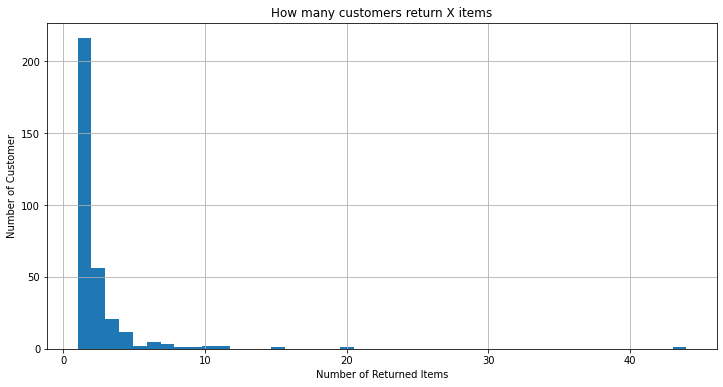

In [77]:
fig, ax = plt.subplots(figsize = (12,6))
ax = ret_df['InvoiceNo'].plot(kind='hist',bins=44)
ax.grid()
ax.set_xlabel('Number of Returned Items')
ax.set_ylabel('Number of Customer')
ax.set_title('How many customers return X items')
plt.show()

**Customers Lifetime Value**



In [85]:
#df.reset_index(level=0, inplace=True) # reset the index 
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']).dt.date # remain the date part only
df = df[(df['Quantity']>0)] # remove the rows with quantity <= 0
cols_of_interest = ['CustomerID', 'InvoiceDate', 'Sales']
df1 = df[cols_of_interest]

In [86]:
df1.head()

,CustomerID,InvoiceDate,Sales
0,17850.0,2010-12-01,15.30
1,17850.0,2010-12-01,20.34
2,17850.0,2010-12-01,22.00
3,17850.0,2010-12-01,20.34
4,17850.0,2010-12-01,20.34


In [87]:
print(df1['CustomerID'].nunique())

4339


In [88]:
#Calculate customers' shopping frequency, the length of time observing new customers and recency
data = summary_data_from_transaction_data(df1,'CustomerID','InvoiceDate', monetary_value_col='Sales',observation_period_end='2011-12-09')
data.head()

,frequency,recency,T,monetary_value
CustomerID,,,,
12346.0,0.0,0.0,325.0,0.000000
12347.0,6.0,365.0,367.0,599.701667
12348.0,3.0,283.0,358.0,301.480000
12349.0,0.0,0.0,18.0,0.000000
12350.0,0.0,0.0,310.0,0.000000


Customer 12346 made one purchase 325 days ago, and no more purchase made later.

In [89]:
df[df['CustomerID'] == 12347.0][['InvoiceNo','Sales','InvoiceDate',]].groupby(['InvoiceNo','InvoiceDate']).sum()

,,Sales
InvoiceNo,InvoiceDate,
537626,2010-12-07,711.79
542237,2011-01-26,475.39
549222,2011-04-07,636.25
556201,2011-06-09,382.52
562032,2011-08-02,584.91
573511,2011-10-31,1294.32
581180,2011-12-07,224.82


In [90]:
print(data.describe())
p = "{:.2%}".format(sum(data['frequency'] == 0)/float(len(data)))
print('\n %d customers perchase only one time, taking a %s of population. \n' %(sum(data['frequency'] == 0), p))                                             

         frequency      recency            T  monetary_value
count  4339.000000  4339.000000  4339.000000     4339.000000
mean      2.864024   130.741415   222.782899      306.944168
std       5.952745   132.210176   117.883623     2612.453380
min       0.000000     0.000000     0.000000        0.000000
25%       0.000000     0.000000   112.000000        0.000000
50%       1.000000    93.000000   248.000000      176.940000
75%       3.000000   252.000000   326.000000      360.161667
max     131.000000   373.000000   373.000000   168469.600000

 1549 customers perchase only one time, taking a 35.70% of population. 



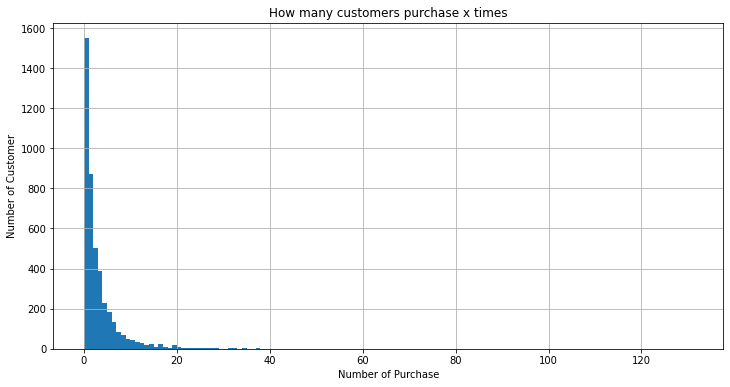

In [93]:
fig, ax = plt.subplots(figsize = (12,6))
ax = data['frequency'].plot(kind='hist',bins=131)
ax.grid()
ax.set_xlabel('Number of Purchase')
ax.set_ylabel('Number of Customer')
ax.set_title('How many customers purchase x times')
plt.show()

**Customer Stickness Analysis based on BG/NBD**

In [94]:
from lifetimes import BetaGeoFitter
bgf = BetaGeoFitter(penalizer_coef=0.0) 
bgf.fit(data['frequency'], data['recency'], data['T']) 
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 4339 subjects, a: 0.00, alpha: 68.89, b: 6.75, r: 0.83>


In [95]:
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.826433,0.026780,0.773944,0.878922
alpha,68.890678,2.611055,63.773011,74.008345
a,0.003443,0.010347,-0.016837,0.023722
b,6.749363,22.412933,-37.179985,50.678711


**Visualization of Frequency/Recency Matrix**

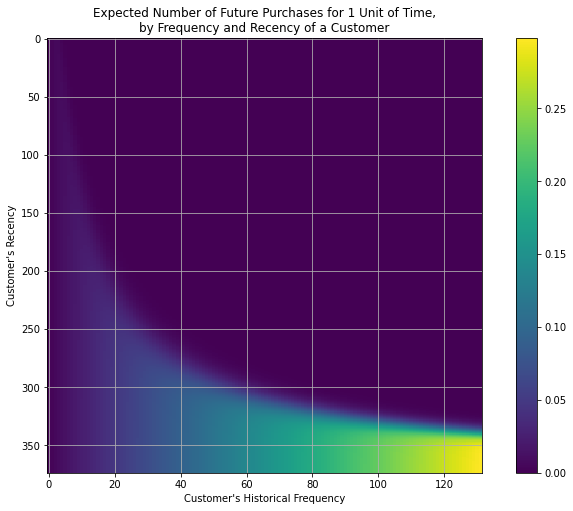

In [96]:
#from lifetimes.plotting import plot_frequency_recency_matrix
fig = plt.figure(figsize=(12,8))
plt.grid()
plot_frequency_recency_matrix(bgf); 

We can see that if a customer has bought more than 120 times, and his/her latest purchase was when he/she was more than 350 days old, then this is our best customer (bottom-right). The coldest customers are those that are in the top-right corner: they bought a lot quickly, and we haven’t seen them in weeks.

There’s also a tail around (20,250). That represents the customer who buys not that frequently, but we’ve seen him or her recently, so they might buy again - we’re not sure if they are dead or just between purchases.

In [97]:
# The best customer
data[data['frequency']>=120]

,frequency,recency,T,monetary_value
CustomerID,,,,
14911.0,131.0,372.0,373.0,1093.661679


In [98]:
df[df['CustomerID'] == 14911][['InvoiceNo','Sales','InvoiceDate',]].groupby(['InvoiceNo','InvoiceDate']).sum()

,,Sales
InvoiceNo,InvoiceDate,
536540,2010-12-01,540.38
536541,2010-12-01,15.00
536803,2010-12-02,22.50
536975,2010-12-03,1705.65
537368,2010-12-06,377.50
...,...,...
580557,2011-12-05,75.40
581003,2011-12-07,1273.15
581006,2011-12-07,1186.78


**probability of still being alive**

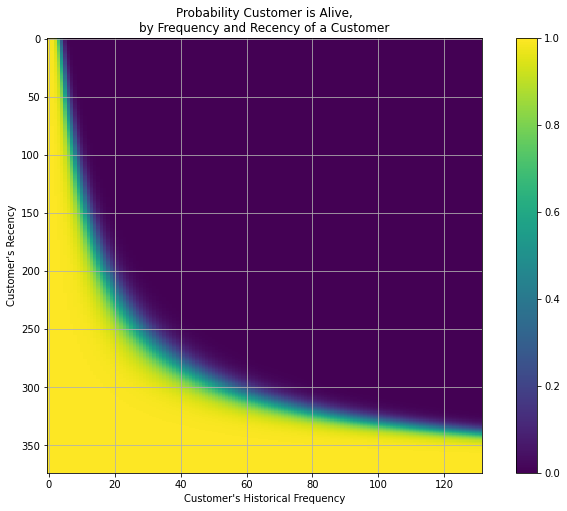

In [99]:
from lifetimes.plotting import plot_probability_alive_matrix
fig = plt.figure(figsize=(12,8))
plt.grid()
plot_probability_alive_matrix(bgf); #Predict alive customers

**Predicting alive customers' purchasing porbability in a period.**

In [100]:
# Predict customers' perchase in next week
t = 7
data['predicted_purchases_next_week'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, data['frequency'], 
                                                                                      data['recency'], 
                                                                                      data['T']) 
data.sort_values(by='predicted_purchases_next_week').tail(5)

,frequency,recency,T,monetary_value,predicted_purchases_next_week
CustomerID,,,,,
14606.0,88.0,372.0,373.0,135.890114,1.407002
15311.0,89.0,373.0,373.0,677.729438,1.422854
17841.0,111.0,372.0,373.0,364.452162,1.771332
12748.0,113.0,373.0,373.0,298.360885,1.803028
14911.0,131.0,372.0,373.0,1093.661679,2.088140


These 5 customers who have made around 100 purchases respectivly, and pruchased recently. So they are probably going to buy again in the next period.

In [101]:
# Predict customers' perchase probability in next month
t = 30
data['predicted_purchases_next_month'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, data['frequency'], 
                                                                                      data['recency'], 
                                                                                      data['T']) 
data.sort_values(by='predicted_purchases_next_month').tail(5)

,frequency,recency,T,monetary_value,predicted_purchases_next_week,predicted_purchases_next_month
CustomerID,,,,,,
14606.0,88.0,372.0,373.0,135.890114,1.407002,6.029510
15311.0,89.0,373.0,373.0,677.729438,1.422854,6.097442
17841.0,111.0,372.0,373.0,364.452162,1.771332,7.590787
12748.0,113.0,373.0,373.0,298.360885,1.803028,7.726616
14911.0,131.0,372.0,373.0,1093.661679,2.088140,8.948418


**Customer Probability Histories**

Given a customer transaction history, we can calculate their historical probability of being alive, according to our trained model

In [106]:
from lifetimes.plotting import plot_history_alive

frequency                           6.000000
recency                           365.000000
T                                 367.000000
monetary_value                    599.701667
predicted_purchases_next_week       0.109591
predicted_purchases_next_month      0.469651
Name: 12347.0, dtype: float64

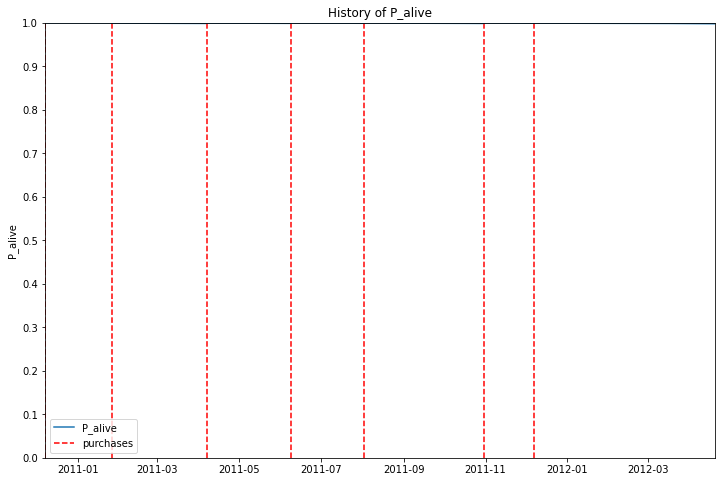

In [108]:
# Calculate the historical probability of being alive of a specific customer 
#id = 13093
id = 12347
# id = 14911
days_since_birth = 500
sp_trans = df.loc[df['CustomerID'] == id]
fig = plt.figure(figsize=(12,8))
plot_history_alive(bgf, days_since_birth, sp_trans, 'InvoiceDate');
#df[df['CustomerID']==id][['InvoiceNo','Quantity','Sales']].groupby(['InvoiceNo']).sum()
data.loc[id]

frequency                          131.000000
recency                            372.000000
T                                  373.000000
monetary_value                    1093.661679
predicted_purchases_next_week        2.088140
predicted_purchases_next_month       8.948418
Name: 14911.0, dtype: float64

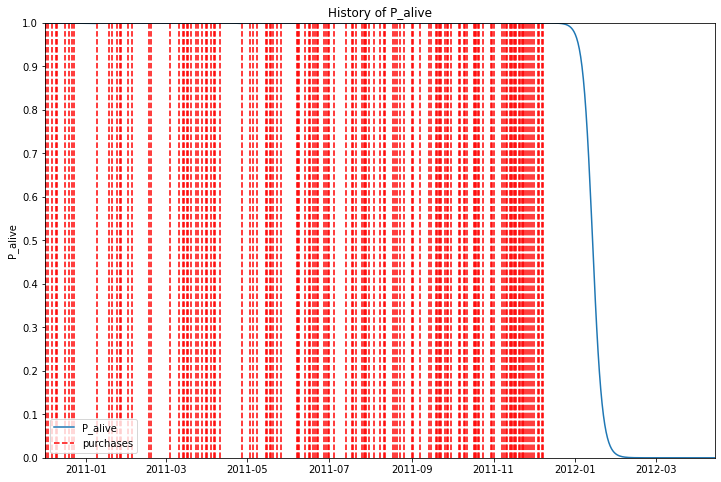

In [109]:
# Calculate the historical probability of being alive of our best customer 
id = 14911
days_since_birth = 500
sp_trans = df.loc[df['CustomerID'] == id]
fig = plt.figure(figsize=(12,8))
plot_history_alive(bgf, days_since_birth, sp_trans, 'InvoiceDate');
#df[df['CustomerID']==id][['InvoiceNo','Quantity','Sales']].groupby(['InvoiceNo']).sum()
data.loc[id]

**Estimating customer lifetime value using the Gamma-Gamma model**  
The Gamma-Gamma submodel assumes that there is no relationship between the monetary value and the purchase frequency. So we need to check whether the Pearson correlation between the two vectors is close to 0 in order to use this model.

In [110]:
returning_customers_summary = data[data['frequency']>0]
returning_customers_summary.head()

,frequency,recency,T,monetary_value,predicted_purchases_next_week,predicted_purchases_next_month
CustomerID,,,,,,
12347.0,6.0,365.0,367.0,599.701667,0.109591,0.469651
12348.0,3.0,283.0,358.0,301.480000,0.062692,0.268668
12352.0,6.0,260.0,296.0,368.256667,0.130877,0.560863
12356.0,2.0,303.0,325.0,269.905000,0.050203,0.215146
12358.0,1.0,149.0,150.0,683.200000,0.058377,0.250171


In [111]:
print('\nThere are %d returning customers. '%len(returning_customers_summary))


There are 2790 returning customers. 


In [112]:
returning_customers_summary[['monetary_value', 'frequency']].corr()

,monetary_value,frequency
monetary_value,1.000000,0.015882
frequency,0.015882,1.000000


The correlation is close to 0, so we can use this model.
At this point we can train our Gamma-Gamma submodel and predict the conditional, expected average lifetime value of our customers.

In [113]:
from lifetimes import GammaGammaFitter
ggf = GammaGammaFitter(penalizer_coef = 0) # Create the model
ggf.fit(returning_customers_summary['frequency'],
        returning_customers_summary['monetary_value']) # Fit the model
print(ggf)

<lifetimes.GammaGammaFitter: fitted with 2790 subjects, p: 2.10, q: 3.45, v: 485.57>


In [115]:
ggf.conditional_expected_average_profit(
        data['frequency'],
        data['monetary_value']).head(10) # Estimate the average transaction value

CustomerID
12346.0    416.917667
12347.0    569.988807
12348.0    333.762672
12349.0    416.917667
12350.0    416.917667
12352.0    376.166864
12353.0    416.917667
12354.0    416.917667
12355.0    416.917667
12356.0    324.008941
dtype: float64

In [114]:
bgf.fit(data['frequency'], data['recency'], data['T'])
clv = ggf.customer_lifetime_value(
    bgf, #the model to use to predict the number of future transactions
    data['frequency'],
    data['recency'],
    data['T'],
    data['monetary_value'],
    time=12, # months
    discount_rate=0.01 # monthly discount rate ~ 12.7% annually
)
clv.head()

CustomerID
12346.0     295.248495
12347.0    3010.933997
12348.0    1008.692677
12349.0    1337.106427
12350.0     306.932977
Name: clv, dtype: float64

In [116]:
clv.describe()

count      4339.000000
mean       1993.090844
std        7120.369624
min         263.187346
25%         593.366313
50%        1028.340336
75%        1744.514401
max      222128.930290
Name: clv, dtype: float64

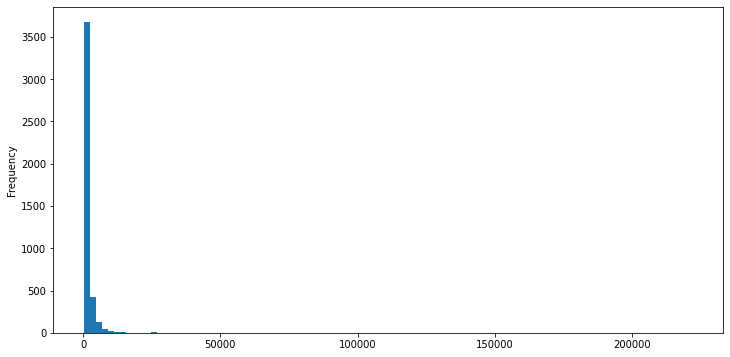

In [ ]:
clv.plot(kind = 'hist',bins = 100, figsize = (12,6));

#### Assessing model fit

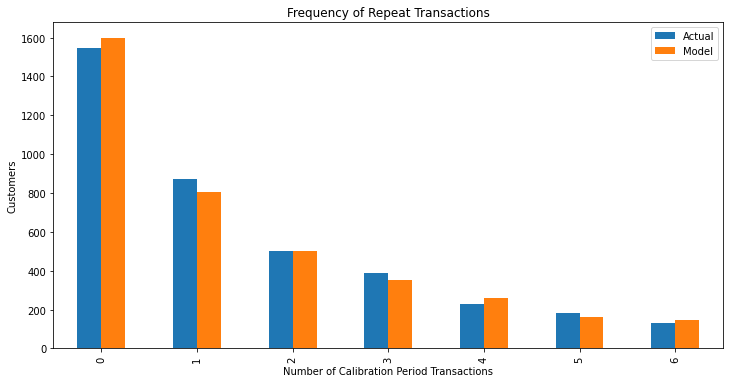

In [102]:
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf,figsize=(12,6));